<a href="https://colab.research.google.com/github/Rrrrabbit/Term3-2_2567/blob/main/SED690/Pseudo_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SED690

SIT@KMUTT
2025


Pseudo colors

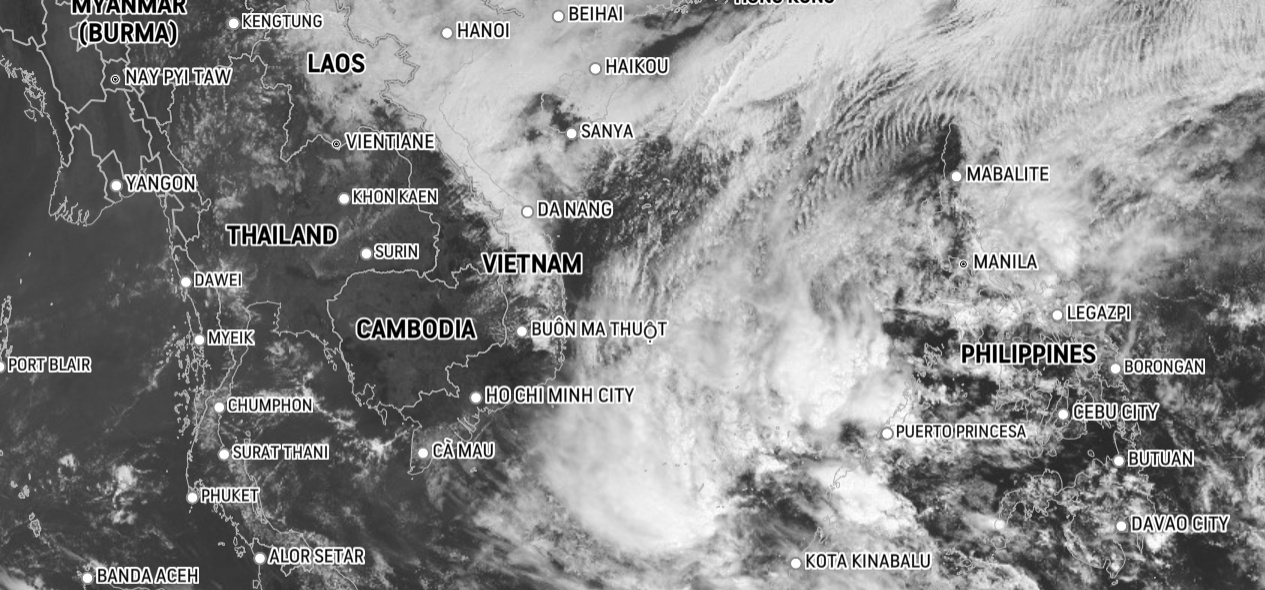

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

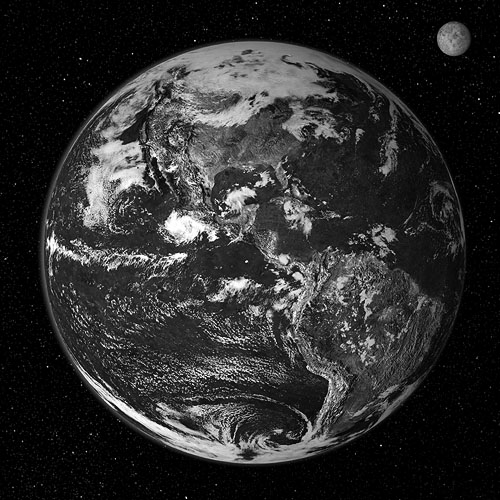

(500, 500)
Grayscale


In [ ]:
img = io.imread("https://images2.pics4learning.com/catalog/e/earth_from_space.jpg")   # use the above image or any of your preferred image.
#img = io.imread("https://images2.pics4learning.com/catalog/p/prari007.jpg")
#image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#img = cv.resize(img, (0,0), fx=0.7, fy=0.7)
# Check width, height, and dimension
cv2_imshow(img)
print(img.shape)
print("Grayscale")


In [ ]:
print(img[:,:])

[[ 64  61  64 ... 195 203 206]
 [ 64  61  61 ... 197 203 206]
 [ 65  63  61 ... 199 207 207]
 ...
 [ 84 100 128 ... 100 118 136]
 [ 81  81  98 ...  95 108 120]
 [107  87  83 ... 101  88  90]]


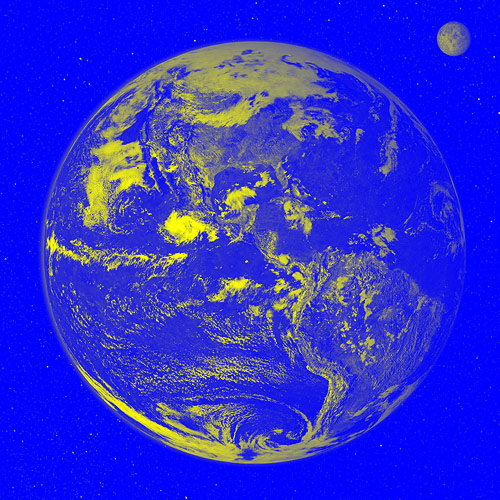

Pseudo color (500, 500, 3)


In [ ]:
# Prepare for 3 channels
threeChannel = np.ones((img.shape[0],img.shape[1],3), dtype=np.uint8) # prepare the storage with the same size as the original image

threeChannel[:,:,0] *= 255 - img[:,:]  # B
threeChannel[:,:,1] *= img[:,:]  # G
threeChannel[:,:,2] *= img[:,:] # R

# image_oneChannel = np.array(oneChannel, np.uint8)
cv2_imshow(threeChannel)
print("Pseudo color", threeChannel.shape)


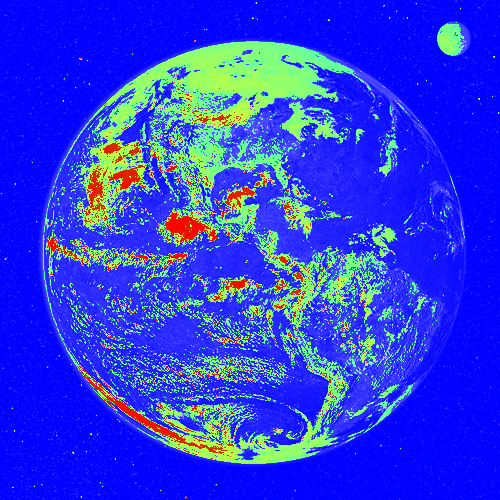

Pseudo color (500, 500, 3)


In [ ]:
# Prepare for 3 channels
threeChannel = np.ones((img.shape[0],img.shape[1],3), dtype=np.uint8) # prepare the storage with the same size as the original image

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        intensity = img[i, j]
        if int(intensity) in range(-1, 86):
          threeChannel[i,j,0] *= 255  # B
          threeChannel[i,j,1] *= img[i,j]  # G
          threeChannel[i,j,2] *= img[i,j]  # R
        elif int(intensity) in range(85, 200):
          threeChannel[i,j,0] *= 255 - img[i,j]  # B
          threeChannel[i,j,1] *= 255  # G
          threeChannel[i,j,2] *= img[i,j]  # R
        else:
          threeChannel[i,j,0] *= 0  # B
          threeChannel[i,j,1] *= 255 - img[i,j]  # G
          threeChannel[i,j,2] *= img[i,j]  # R

cv2_imshow(threeChannel)
print("Pseudo color", threeChannel.shape)


To do:

Try to use pseudo coloring to show many different colors, which vary according
to the grayscale intensity levels.

See an example below.


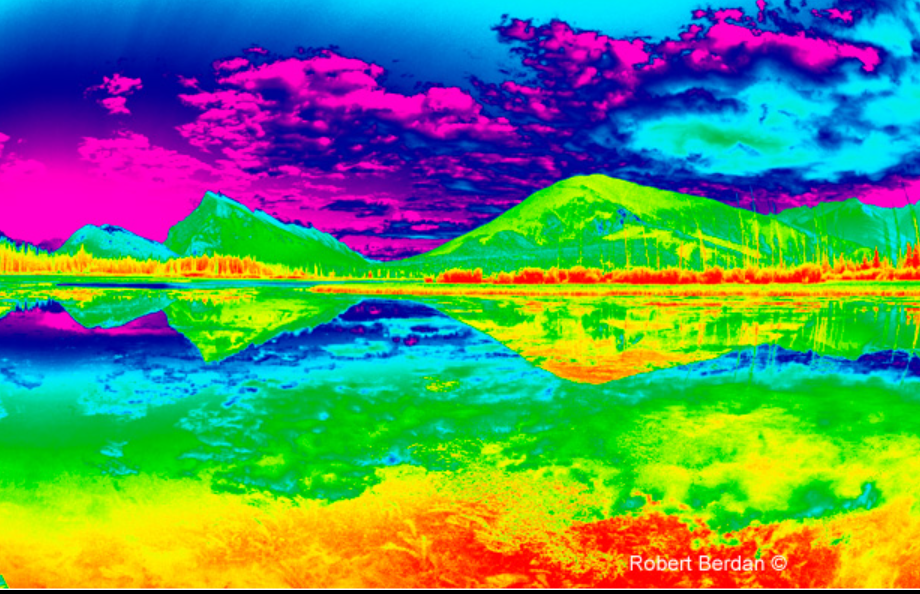

						Colormap Jet						VS						Manual map color


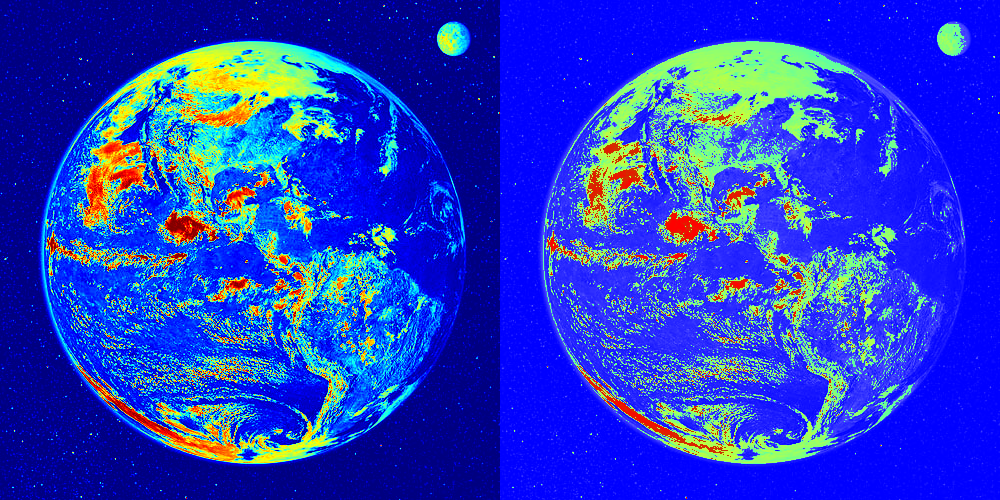

In [ ]:
# Using OpenCV's applyColorMap
color_map = cv.applyColorMap(img, cv.COLORMAP_JET)

res = np.hstack((color_map, threeChannel)) #stacking images side-by-side, for a clear comparison
print("\t\t\t\t\t\tColormap Jet\t\t\t\t\t\tVS\t\t\t\t\t\tManual map color")
cv2_imshow(res)

In [ ]:
for i in range (85, 90):
  print(i)
  i += 1

85
86
87
88
89


[[ 1  1  0 ...  0  0  2]
 [ 1  1  1 ...  0  0  1]
 [ 0  1  3 ...  0  0  0]
 ...
 [15  0  0 ...  0  0  0]
 [ 6  0  9 ...  1  0  0]
 [ 0  0  8 ...  2  0  0]]

Pseudo-colored Image (Custom Colormap)


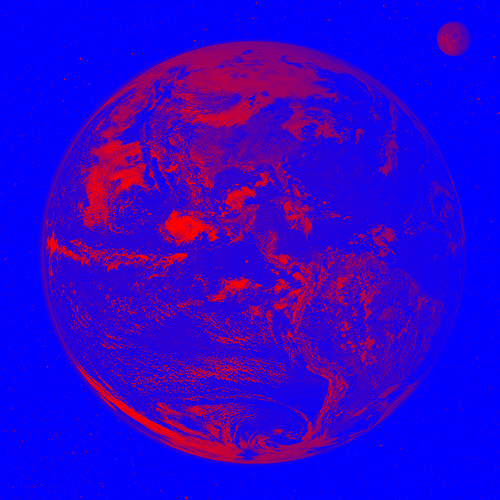

In [ ]:
# Option 2: Manual Color Mapping (More Control)
# Create a custom colormap (example: blue to red)
def custom_colormap(value):
    # value should be between 0 and 255
    blue = value
    green = 0  # You can adjust green if needed
    red = 255 - value
    return [blue, green, red]

pseudo_colored_2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
#print(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        intensity = img[i, j]
        #print(intensity)
        color = custom_colormap(intensity)
        pseudo_colored_2[i, j] = color

# 3. Display the Results
#print("Original Grayscale")
#cv2_imshow(img)

#print("\nPseudo-colored Image (OpenCV Colormap)")
#cv2_imshow(pseudo_colored_1)

print("\nPseudo-colored Image (Custom Colormap)")
cv2_imshow(pseudo_colored_2)


Pseudo-colored Image (Custom Colormap)


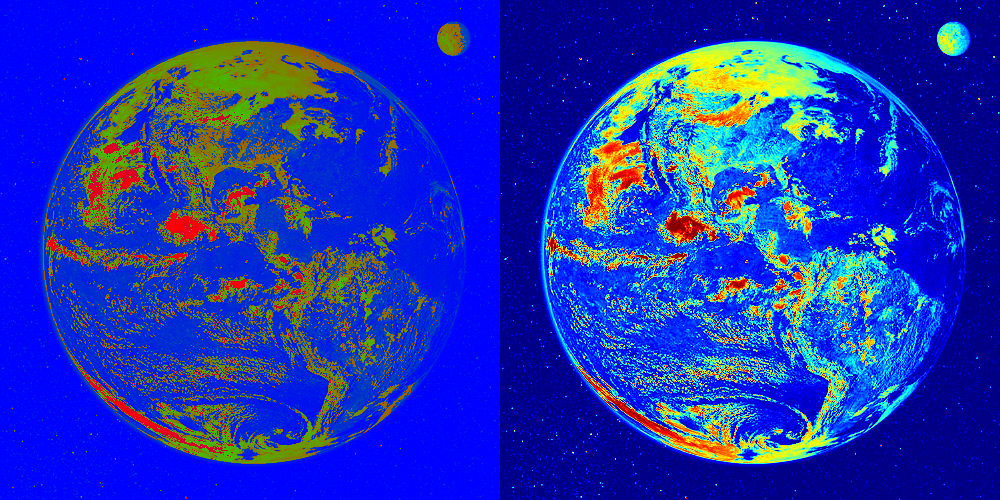

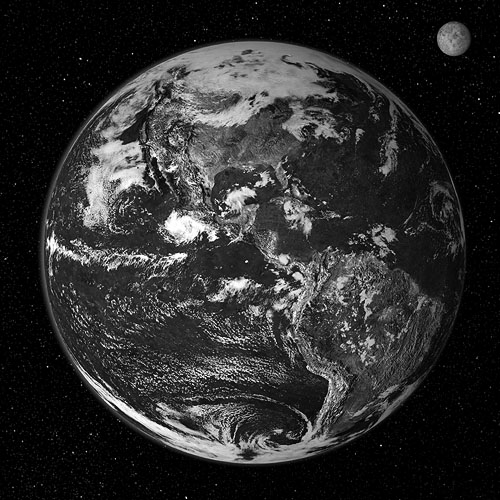

In [ ]:
# Option 2: Manual Color Mapping (More Control)
# Create a custom colormap (example: blue to red)
def custom_colormap(value):
    # value should be between 0 and 255
    if int(value) in range(-1, 86):
        blue = 255 - value
        green = value
        red = 0
        return [blue, green, red]
    elif int(value) in range(85, 200):
        blue = 0
        green = value
        red = 255 - value
        return [blue, green, red]
    else:
        blue = 255 - value
        green = 0
        red = value
        return [blue, green, red]

pseudo_colored_2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
#print(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        intensity = img[i, j]
        #print(intensity)
        color = custom_colormap(intensity)
        pseudo_colored_2[i, j] = color

# 3. Display the Results
#print("Original Grayscale")
#cv2_imshow(img)

#print("\nPseudo-colored Image (OpenCV Colormap)")
#cv2_imshow(pseudo_colored_1)

print("\nPseudo-colored Image (Custom Colormap)")
res = np.hstack((pseudo_colored_2, pseudo_colored_1)) #stacking images side-by-side, for a clear comparison
cv2_imshow(res)
cv2_imshow(img)

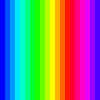

-1

In [ ]:
import numpy as np
import cv2

N_STEPS = 20
h = np.linspace(0, 180, N_STEPS, endpoint=False) # cv2 Hue range is [0, 179]
s = np.ones_like(h)*255   # cv2 saturation range is from [0, 255]; adjust it to your liking
v = np.ones_like(h)*255   # cv2 value range is from [0, 255]; adjust it to your liking
hsv_colormap = np.dstack([h,s,v])

rgb_colormap = cv2.cvtColor(np.uint8(hsv_colormap), cv2.COLOR_HSV2RGB)

IMG_SIZE = 100
#intensities = np.random.random((IMG_SIZE,IMG_SIZE)) # from 0 to 1
intensities = np.array([np.linspace(0,1, IMG_SIZE, endpoint=False), ]*IMG_SIZE) # from 0 to 1
intensity_indices = np.uint8(N_STEPS*intensities) # map insity ranges to discretized intervals

color_mapped_intensities = rgb_colormap[0,intensity_indices,:]
cv2_imshow(color_mapped_intensities)

cv2.waitKey(0)

In [ ]:
#https://stackoverflow.com/questions/52498777/apply-matplotlib-or-custom-colormap-to-opencv-image
image_gray = img

def apply_custom_colormap(image_gray, cmap=plt.get_cmap('seismic')):

    assert image_gray.dtype == np.uint8, 'must be np.uint8 image'
    if image_gray.ndim == 3:
      image_gray = image_gray.squeeze(-1)

    # Initialize the matplotlib color map
    sm = plt.cm.ScalarMappable(cmap=cmap)

    # Obtain linear color range
    color_range = sm.to_rgba(np.linspace(0, 1, 256))[:,0:3]    # color range RGBA => RGB
    color_range = (color_range*255.0).astype(np.uint8)         # [0,1] => [0,255]
    color_range = np.squeeze(np.dstack([color_range[:,2], color_range[:,1], color_range[:,0]]), 0)  # RGB => BGR

    # Apply colormap for each channel individually
    channels = [cv2.LUT(image_gray, color_range[:,i]) for i in range(3)]
    return np.dstack(channels)


image_gray = cv2.imread('https://images2.pics4learning.com/catalog/e/earth_from_space.jpg', cv2.IMREAD_GRAYSCALE)
image_bgr = apply_custom_colormap(image_gray, cmap=plt.get_cmap('bwr'))

cv2_imshow(image_bgr)
cv2.waitKey(0)

AttributeError: 'NoneType' object has no attribute 'dtype'